# 3일차 복습 풀이

## 데이터 및 전처리

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

df = pd.read_csv('tute1.csv', parse_dates=True, index_col='Date')

In [8]:
n = len(df)
df['t'] = np.arange(n)
years = int(np.ceil(n/4))
df['season'] = np.tile([1,2,3,4], years)[:n]

df.head()

,Sales,AdBudget,GDP,t,season
Date,,,,,
1981-03-01,1020.2,659.2,251.8,0,1
1981-06-01,889.2,589.0,290.9,1,2
1981-09-01,795.0,512.5,290.8,2,3
1981-12-01,1003.9,614.1,292.4,3,4
1982-03-01,1057.7,647.2,279.1,4,1


## 선형 추세

In [9]:
ols('Sales ~ t', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6817
Date:                Thu, 08 Aug 2024   Prob (F-statistic):              0.411
Time:                        20:55:38   Log-Likelihood:                -599.80
No. Observations:                 100   AIC:                             1204.
Df Residuals:                      98   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    934.8032     19.535     47.852      0.000     896.036     973.571
t              0.2815      0.341      0.826      0.411      -0.395       0.958
==============================================================================
Omnibus:                       12.605   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.652
Skew:                          -0.350   Prob(JB):                       0.0592
Kurtosis:                       2.068   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 계절성

In [11]:
ols('Sales ~ C(season)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     118.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           4.19e-32
Time:                        20:55:58   Log-Likelihood:                -522.86
No. Observations:                 100   AIC:                             1054.
Df Residuals:                      96   BIC:                             1064.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1050.0000      9.213    113.972      0.000    1031.713    1068.287
C(season)[T.2]   -84.1040     13.029     -6.455      0.000    -109.966     -58.242
C(season)[T.3]  -239.5920     13.029    -18.389      0.000    -265.454    -213.730
C(season)[T.4]   -81.3560     13.029     -6.244      0.000    -107.218     -55.494
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.712
Skew:                           0.279   Prob(JB):                        0.425
Kurtosis:                       3.316   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 독립변수 조합 찾기

In [15]:
ols('Sales ~ AdBudget', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     458.9
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           9.37e-39
Time:                        20:57:12   Log-Likelihood:                -513.27
No. Observations:                 100   AIC:                             1031.
Df Residuals:                      98   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.7772     45.538     -0.500      0.618    -113.146      67.592
AdBudget       1.6413      0.077     21.423      0.000       1.489       1.793
==============================================================================
Omnibus:                        6.582   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.810
Skew:                           0.342   Prob(JB):                       0.0201
Kurtosis:                       4.186   Cond. No.                     6.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ols('Sales ~ GDP', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     66.55
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.17e-12
Time:                        20:57:17   Log-Likelihood:                -574.23
No. Observations:                 100   AIC:                             1152.
Df Residuals:                      98   BIC:                             1158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2171.3527    150.061     14.470      0.000    1873.561    2469.144
GDP           -4.3481      0.533     -8.158      0.000      -5.406      -3.290
==============================================================================
Omnibus:                        3.708   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                2.165
Skew:                          -0.098   Prob(JB):                        0.339
Kurtosis:                       2.306   Cond. No.                     5.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ols('Sales ~ AdBudget + GDP', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     242.7
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.77e-38
Time:                        20:57:37   Log-Likelihood:                -510.53
No. Observations:                 100   AIC:                             1027.
Df Residuals:                      97   BIC:                             1035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -438.9770    183.405     -2.393      0.019    -802.985     -74.969
AdBudget       1.8520      0.117     15.806      0.000       1.619       2.085
GDP            1.0365      0.443      2.339      0.021       0.157       1.916
==============================================================================
Omnibus:                        6.293   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.895
Skew:                           0.364   Prob(JB):                       0.0318
Kurtosis:                       4.060   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
ols('Sales ~ AdBudget + C(season)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     115.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.49e-35
Time:                        20:57:46   Log-Likelihood:                -511.84
No. Observations:                 100   AIC:                             1034.
Df Residuals:                      95   BIC:                             1047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -201.4519    258.738     -0.779      0.438    -715.112     312.208
C(season)[T.2]     7.3204     22.238      0.329      0.743     -36.828      51.469
C(season)[T.3]    38.3021     58.611      0.653      0.515     -78.056     154.660
C(season)[T.4]    -5.1703     19.633     -0.263      0.793     -44.147      33.807
AdBudget           1.9260      0.398      4.839      0.000       1.136       2.716
==============================================================================
Omnibus:                        6.063   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.789
Skew:                           0.336   Prob(JB):                       0.0336
Kurtosis:                       4.085   Cond. No.                     3.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ols('Sales ~ AdBudget + GDP + C(season)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     98.78
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           7.42e-36
Time:                        20:58:55   Log-Likelihood:                -508.48
No. Observations:                 100   AIC:                             1029.
Df Residuals:                      94   BIC:                             1045.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -737.5609    327.561     -2.252      0.027   -1387.941     -87.181
C(season)[T.2]     8.6108     21.624      0.398      0.691     -34.324      51.546
C(season)[T.3]    54.9637     57.349      0.958      0.340     -58.904     168.831
C(season)[T.4]    -1.8296     19.131     -0.096      0.924     -39.814      36.155
AdBudget           2.2766      0.411      5.546      0.000       1.462       3.092
GDP                1.1497      0.450      2.555      0.012       0.256       2.043
==============================================================================
Omnibus:                        5.514   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.710
Skew:                           0.339   Prob(JB):                       0.0575
Kurtosis:                       3.955   Cond. No.                     5.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## STL 분해

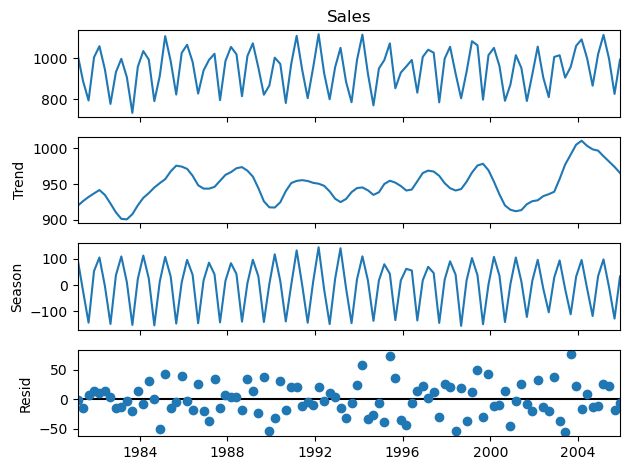

In [24]:
from statsmodels.tsa.seasonal import STL
m = STL(df.Sales, period=4).fit()
m.plot();

추세의 강도

In [22]:
1 - m.resid.var() / (m.trend + m.resid).var()

0.4999592147323638

계절성의 강도

In [23]:
1 - m.resid.var() / (m.seasonal + m.resid).var()

0.9141388728480302